# SLML Datasets Overview

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

In [ ]:
#| hide
import math
from pathlib import Path

import pandas as pd
import numpy as np
from PIL import Image

from singleline_dataset.embeddings import *
from singleline_dataset.fileorg import *
from singleline_dataset.display import *

## The Datasets

```
https://storage.googleapis.com/singleline-datasets/v1/look_f16.npz
https://storage.googleapis.com/singleline-datasets/v1/look_f16__minn10_epsilon1.npz
https://storage.googleapis.com/singleline-datasets/v1/look_i16.npz
https://storage.googleapis.com/singleline-datasets/v1/look_i16__minn10_epsilon1.npz

https://storage.googleapis.com/singleline-datasets/v1/v2-splice-maxstrokes5.npz
https://storage.googleapis.com/singleline-datasets/v1/v2-splice-maxstrokes6.npz

https://storage.googleapis.com/singleline-datasets/v1/epoch-20231214-trainval.npz
https://storage.googleapis.com/singleline-datasets/v1/epoch-20231214-filtered-trainval.npz

https://storage.googleapis.com/singleline-datasets/v1/epoch20240104_trainval08.npz
https://storage.googleapis.com/singleline-datasets/v1/epoch20240104_trainval09.npz

https://storage.googleapis.com/singleline-datasets/v1/epoch20240104_furtherfiltered_trainval08.npz
https://storage.googleapis.com/singleline-datasets/v1/epoch20240104_furtherfiltered_trainval09.npz

https://storage.googleapis.com/singleline-datasets/v1/epoch20240221_expanded10x_trainval.npz
```

In [ ]:
DS_0 = 'look_i16.npz'

DS_1 = 'look_i16__minn10_epsilon1.npz'

DS_2 = 'v2-splice-maxstrokes6.npz'

DS_3 = 'epoch-20231214-trainval.npz'
DS_4 = 'epoch-20231214-filtered-trainval.npz'

DS_5 = 'epoch20240104_trainval09.npz'

DS_6 = 'epoch20240104_furtherfiltered_trainval09.npz'

DS_7 = 'epoch20240221_expanded10x_trainval.npz'

In [ ]:
BASE_PATH = '/Users/al/code/_svg/singleline_models/data/look'

def load_ds(fname, base_path=BASE_PATH):
    payload = np.load(Path(base_path) / fname, encoding='latin1', allow_pickle=True)
    return payload['train'], payload['valid']

In [ ]:
train0, valid0 = load_ds(DS_0)
train1, valid1 = load_ds(DS_1)
train2, valid2 = load_ds(DS_2)
train3, valid3 = load_ds(DS_3)
train4, valid4 = load_ds(DS_4)
train5, valid5 = load_ds(DS_5)
train6, valid6 = load_ds(DS_6)

In [ ]:
len(train5), len(train6)

(2100, 1300)

In [ ]:
len(train3), len(train4)

(2400, 1800)

In [ ]:
len(train1), len(train2)

(1300, 1200)

In [ ]:
from singleline_dataset.transforms import *


def stroke_summary_df(dataset):
    summary = [
        {
            "idx": i,
            "num_points": len(deltas),
            "num_strokes": len(deltas_to_strokes(deltas)),
        }
        for i, deltas in enumerate(dataset)
    ]
    # by_num_strokes = sorted(summary, key=lambda k: k["num_strokes"], reverse=True)
    df = pd.DataFrame(summary)
    return df

In [ ]:
df0 = stroke_summary_df(train0)
df1 = stroke_summary_df(train1)
df2 = stroke_summary_df(train2)
df3 = stroke_summary_df(train3)
df4 = stroke_summary_df(train4)
df5 = stroke_summary_df(train5)
df6 = stroke_summary_df(train6)


<Axes: >

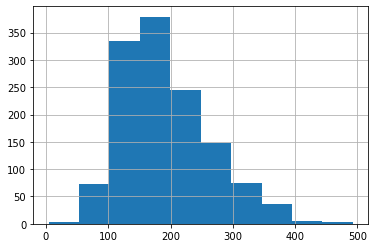

In [ ]:
df0.num_points.hist()
# df0.num_strokes.hist()

<Axes: >

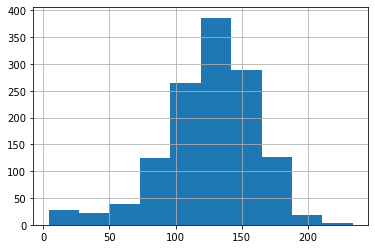

In [ ]:
df1.num_points.hist()

<Axes: >

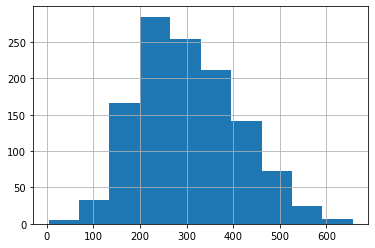

In [ ]:
df2.num_points.hist()

<Axes: >

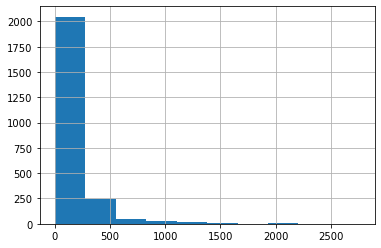

In [ ]:
df3.num_points.hist()

<Axes: >

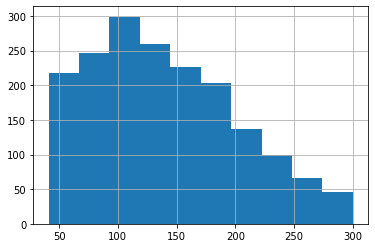

In [ ]:
df4.num_points.hist()

<Axes: >

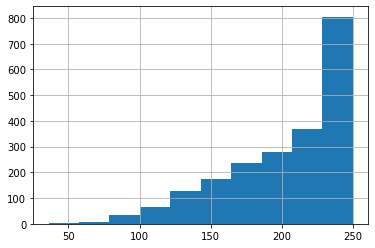

In [ ]:
df5.num_points.hist()

<Axes: >

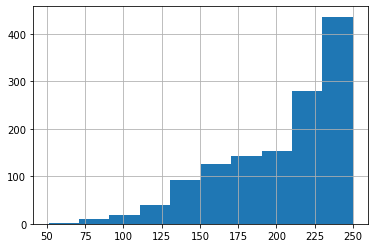

In [ ]:
df6.num_points.hist()

<Axes: title={'center': 'num_points\n(look_i16__minn10)'}>

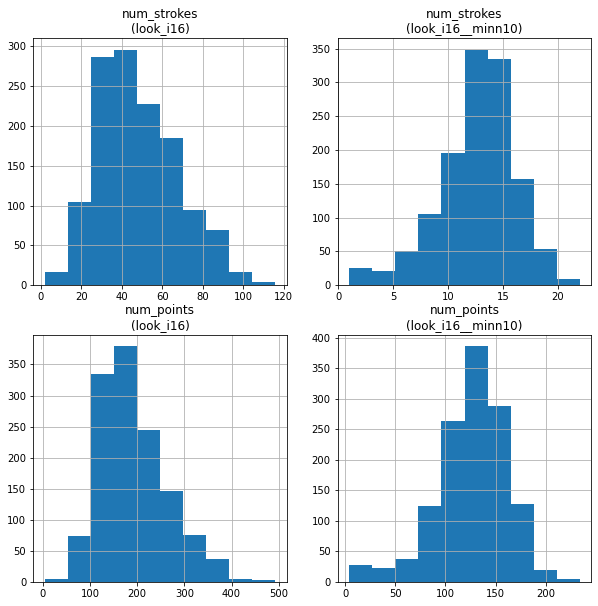

In [ ]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

ax1.set_title('num_strokes\n(look_i16)')
df0.num_strokes.hist(ax=ax1)

ax2.set_title('num_strokes\n(look_i16__minn10)')
df1.num_strokes.hist(ax=ax2)

ax3.set_title('num_points\n(look_i16)')
df0.num_points.hist(ax=ax3)

ax4.set_title('num_points\n(look_i16__minn10)')
df1.num_points.hist(ax=ax4)


In [ ]:
len(df0), len(df1)

(1300, 1300)

<Axes: title={'center': 'num_points\n(epoch=v2-splicedata)'}>

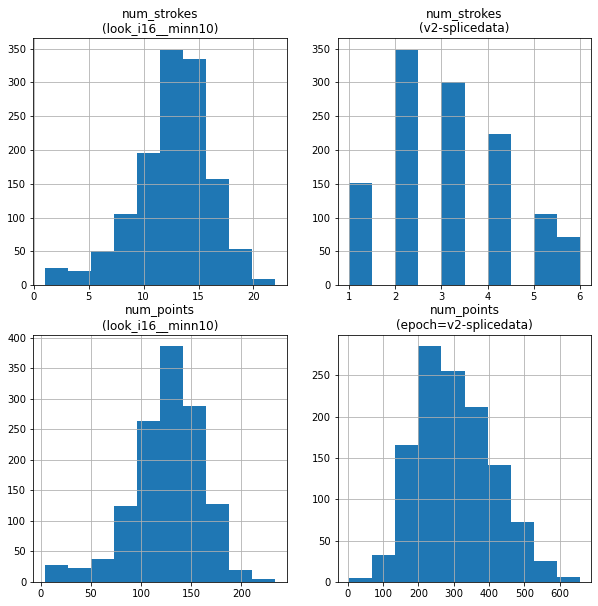

In [ ]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

ax1.set_title('num_strokes\n(look_i16__minn10)')
df1.num_strokes.hist(ax=ax1)

ax2.set_title('num_strokes\n(v2-splicedata)')
df2.num_strokes.hist(ax=ax2)

ax3.set_title('num_points\n(look_i16__minn10)')
df1.num_points.hist(ax=ax3)
ax4.set_title('num_points\n(epoch=v2-splicedata)')
df2.num_points.hist(ax=ax4)


In [ ]:
len(df1), len(df2)

(1300, 1200)

<Axes: title={'center': 'num_points\n(epoch=20231214-filtered)'}>

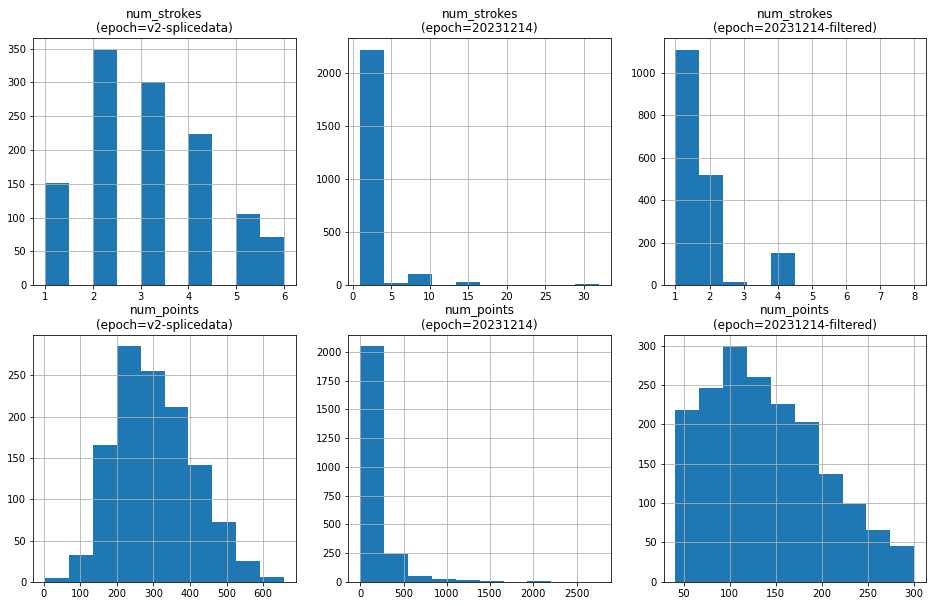

In [ ]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16,10))

ax1.set_title('num_strokes\n(epoch=v2-splicedata)')
df2.num_strokes.hist(ax=ax1)
ax2.set_title('num_strokes\n(epoch=20231214)')
df3.num_strokes.hist(ax=ax2)
ax3.set_title('num_strokes\n(epoch=20231214-filtered)')
df4.num_strokes.hist(ax=ax3)

ax4.set_title('num_points\n(epoch=v2-splicedata)')
df2.num_points.hist(ax=ax4)
ax5.set_title('num_points\n(epoch=20231214)')
df3.num_points.hist(ax=ax5)
ax6.set_title('num_points\n(epoch=20231214-filtered)')
df4.num_points.hist(ax=ax6)

In [ ]:
len(df2), len(df3), len(df4)

(1200, 2400, 1800)

In [ ]:
df3[df3.num_points > 300]

,idx,num_points,num_strokes
8,8,1034,8
9,9,1127,16
16,16,329,4
26,26,320,4
33,33,331,4
...,...,...,...
2372,2372,315,2
2376,2376,1093,16
2389,2389,323,4
2395,2395,1389,16


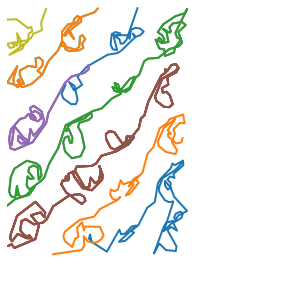

In [ ]:
plot_strokes(deltas_to_strokes(train3[9]))

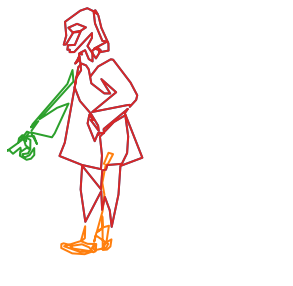

In [ ]:
plot_strokes(deltas_to_strokes(train3[16]))

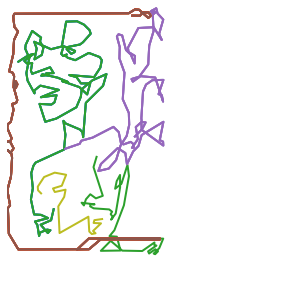

In [ ]:
plot_strokes(deltas_to_strokes(train3[2376]))

In [ ]:
df3[df3.num_points < 50]

,idx,num_points,num_strokes
21,21,23,1
24,24,28,1
32,32,20,1
52,52,49,1
60,60,35,1
...,...,...,...
2370,2370,41,1
2382,2382,20,1
2383,2383,32,1
2392,2392,38,1


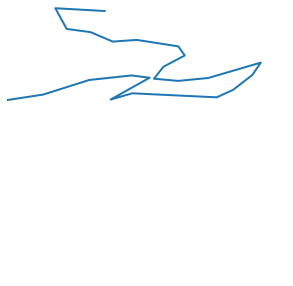

In [ ]:
plot_strokes(deltas_to_strokes(train3[21]))

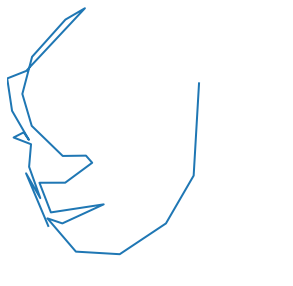

In [ ]:
plot_strokes(deltas_to_strokes(train3[2394]))

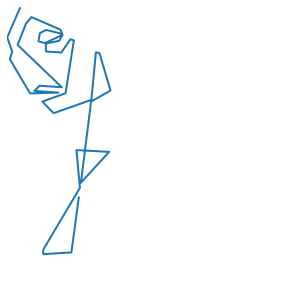

In [ ]:
plot_strokes(deltas_to_strokes(train3[2370]))

<Axes: title={'center': 'num_points\n(20240104-furtherfiltered)'}>

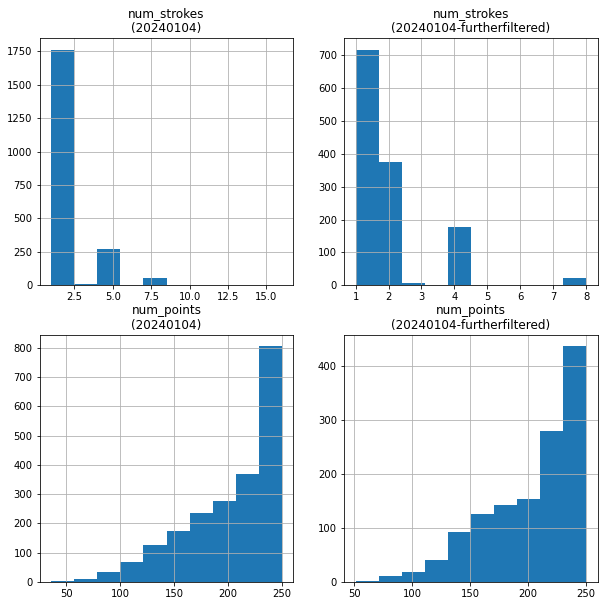

In [ ]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

ax1.set_title('num_strokes\n(20240104)')
df5.num_strokes.hist(ax=ax1)
ax2.set_title('num_strokes\n(20240104-furtherfiltered)')
df6.num_strokes.hist(ax=ax2)

ax3.set_title('num_points\n(20240104)')
df5.num_points.hist(ax=ax3)
ax4.set_title('num_points\n(20240104-furtherfiltered)')
df6.num_points.hist(ax=ax4)


In [ ]:
len(df5), len(df6)

(2100, 1300)